## Assignment 1: Introduction to Data Science and AI

### Group  32 : Aghigh Merikhi - Seyedehnaghmeh Mosaddeghi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Data
gdp_data = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")

# Print the shape of the dataset
print(gdp_data.shape)

gdp_data.head(10)


(62893, 8)


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.7,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,28.0,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.4,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.9,1240.0,NaN,7764549.0,NaN
5,Afghanistan,AFG,1954,29.2,1245.0,NaN,7864289.0,NaN
6,Afghanistan,AFG,1955,29.9,1246.0,NaN,7971933.0,NaN
7,Afghanistan,AFG,1956,30.4,1278.0,NaN,8087730.0,NaN
8,Afghanistan,AFG,1957,30.9,1253.0,NaN,8210207.0,NaN
9,Afghanistan,AFG,1958,31.5,1298.0,NaN,8333827.0,NaN


To make sure that our analysis is accurate, the above data has to be cleaned up. It has useless columns, incorrect values, and missing data (NaN) that might affect our outcomes. To solve these problems, we implemented a data cleaning Function that that performs the following tasks:
1- Filter Rows by Year: We kept rows where the "Year" is within the valid dataset range.(1800-2021)
2- Remove Rows with Missing Values: Rows containing NaN values in the "GDP per capita" and "Life expectancy" columns were removed to prevent error of our analysis.
3- Eliminate Unnecessary Columns: We eliminate the "417485-annotations" and "Continent" columns as they do not contribute to our analysis.

In [3]:
# Function for cleaning the data

def clean_data(df):
    
    # Remove rows with incorrect years
    valid_years = range(1800, 2021)  # Years from 1800 to 2021
    df = df[df["Year"].isin(valid_years)]
    
    # Remove rows with NaN values in "GDP" and "Life Expectancy" columns
    df = df.dropna(subset=['GDP per capita', 'Life expectancy at birth (historical)'], how='any')
    
    # Remove irrelevant columns
    df.drop(['417485-annotations'], axis=1, inplace=True)
    df.drop(['Continent'], axis=1, inplace=True)

    return df


In [4]:
# Cleaning the dataset with our function
cleaned_gdp_data = clean_data(gdp_data)

# Save cleaned dataset
cleaned_gdp_data.to_csv("cleaned_gdp_data.csv", index=False)

# Print the shape of the cleaned dataset
print(cleaned_gdp_data.shape)

cleaned_gdp_data.head(15)


(12344, 6)


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,Population (historical estimates)
1,Afghanistan,AFG,1950,27.7,1156.0,7480464.0
2,Afghanistan,AFG,1951,28.0,1170.0,7571542.0
3,Afghanistan,AFG,1952,28.4,1189.0,7667534.0
4,Afghanistan,AFG,1953,28.9,1240.0,7764549.0
5,Afghanistan,AFG,1954,29.2,1245.0,7864289.0
6,Afghanistan,AFG,1955,29.9,1246.0,7971933.0
7,Afghanistan,AFG,1956,30.4,1278.0,8087730.0
8,Afghanistan,AFG,1957,30.9,1253.0,8210207.0
9,Afghanistan,AFG,1958,31.5,1298.0,8333827.0
10,Afghanistan,AFG,1959,32.0,1307.0,8468220.0


As can be seen in the above table, the data is cleaned now. And the Below figure shows the scatter plot of GDP per Capita Vs. Life expectancy.

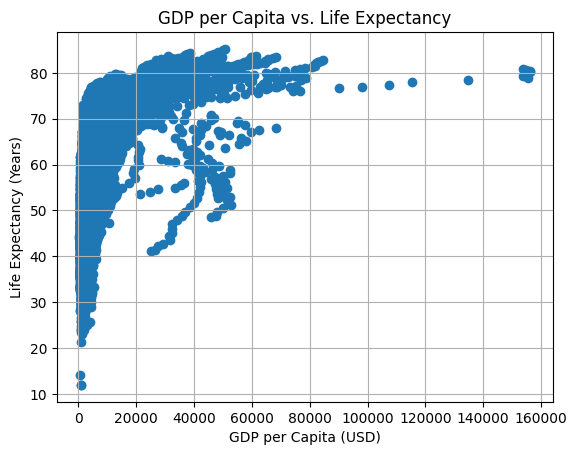

In [5]:
# Scatter plot
plt.scatter(cleaned_gdp_data["GDP per capita"], cleaned_gdp_data["Life expectancy at birth (historical)"])
plt.title("GDP per Capita vs. Life Expectancy")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Life Expectancy (Years)")
plt.grid(True)
plt.show()

We can also plot the above plot for a specific year to have a better comparison. For this part we considered the data for 2017.

In [6]:
data_2017 = cleaned_gdp_data[cleaned_gdp_data['Year'] == 2017]
data_2017.head(10)


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,Population (historical estimates)
68,Afghanistan,AFG,2017,63.0,2014.7452,35643420.0
663,Albania,ALB,2017,79.0,10702.1200,2879361.0
925,Algeria,DZA,2017,75.7,14267.2300,41136548.0
1633,Angola,AGO,2017,61.7,8146.4355,30208634.0
2290,Argentina,ARG,2017,76.8,19200.9060,44054616.0
2534,Armenia,ARM,2017,74.9,10859.3780,2851929.0
3266,Australia,AUS,2017,83.0,49265.6130,24590336.0
3503,Austria,AUT,2017,81.6,42177.3700,8797497.0
3753,Azerbaijan,AZE,2017,72.2,16522.3070,10071569.0
4272,Bahrain,BHR,2017,79.7,40695.7150,1456844.0


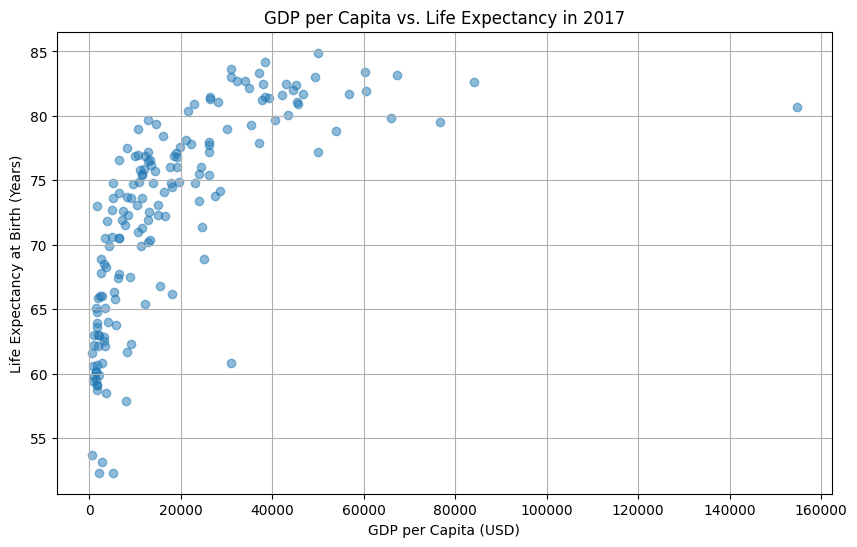

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2017["GDP per capita"], data_2017["Life expectancy at birth (historical)"], alpha=0.5)
plt.title("GDP per Capita vs. Life Expectancy in 2017")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.grid(True)
plt.show()

## Questions

1. Which countries have a life expectancy higher than one standard deviation above the mean?

In [8]:
mean_life_expectancy = data_2017["Life expectancy at birth (historical)"].mean()
std_life_expectancy = data_2017["Life expectancy at birth (historical)"].std()
high_life_expectancy_countries = data_2017[data_2017["Life expectancy at birth (historical)"] > (mean_life_expectancy + std_life_expectancy)]
high_life_expectancy_countries_sorted = high_life_expectancy_countries.sort_values(by="Life expectancy at birth (historical)", ascending=False)

print(f'{len(high_life_expectancy_countries_sorted)} countries with high life expectancy:')
for index, row in high_life_expectancy_countries_sorted.iterrows():
    print(f"{row['Entity']}: {row['Life expectancy at birth (historical)']}")


31 countries with high life expectancy:
Hong Kong: 84.9
Japan: 84.2
Malta: 83.6
Switzerland: 83.4
South Korea: 83.3
Singapore: 83.2
Australia: 83.0
Spain: 83.0
Israel: 82.7
Italy: 82.7
Norway: 82.6
Iceland: 82.5
France: 82.5
Sweden: 82.4
New Zealand: 82.2
Canada: 82.0
Ireland: 81.9
Luxembourg: 81.7
Netherlands: 81.7
Austria: 81.6
Finland: 81.5
Portugal: 81.5
Belgium: 81.4
Cyprus: 81.3
United Kingdom: 81.2
Slovenia: 81.1
Denmark: 81.1
Germany: 80.9
Greece: 80.9
Qatar: 80.7
Chile: 80.4


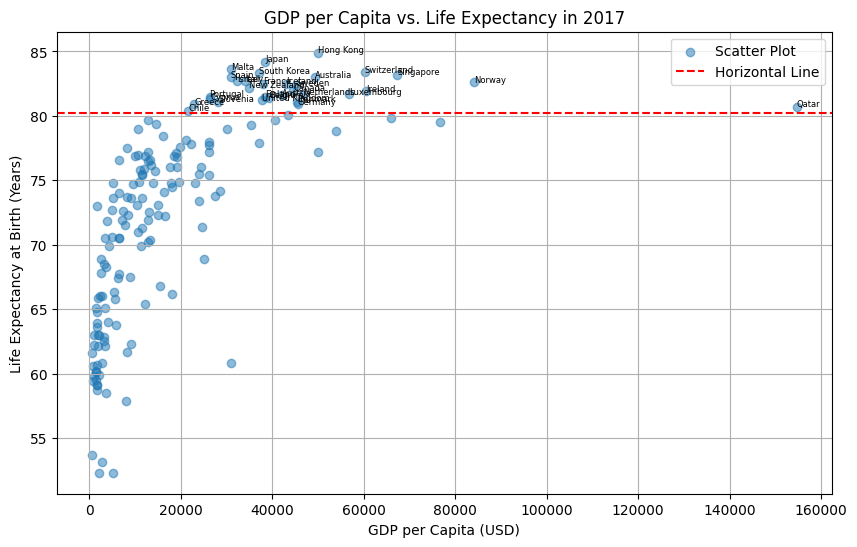

In [9]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data_2017["GDP per capita"], data_2017["Life expectancy at birth (historical)"], alpha=0.5, label='Scatter Plot')

# Calculate the y-value for the horizontal line
y_value = data_2017['Life expectancy at birth (historical)'].std() + data_2017['Life expectancy at birth (historical)'].mean()

# Horizontal line
plt.axhline(y=y_value, color='red', linestyle='--', label='Horizontal Line')

# Add labels, title, legend, and grid
plt.title("GDP per Capita vs. Life Expectancy in 2017")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.legend()
plt.grid(True)

# Annotate data points above the line with country names
for i, row in data_2017.iterrows():
    if row["Life expectancy at birth (historical)"] > y_value:
        plt.text(row["GDP per capita"], row["Life expectancy at birth (historical)"], row["Entity"], fontsize=6)

# Show the plot
plt.show()




2. Which countries have high life expectancy but have low GDP (note the difference between GDP and GDP per capita)? Motivate how you have chosen to define “high” and “low.”

In [10]:
# Calculate GDP for each country
data_2017["GDP"] = data_2017["GDP per capita"] * data_2017["Population (historical estimates)"]

# Calculate the median life expectancy and GDP
median_life_expectancy = data_2017["Life expectancy at birth (historical)"].median()
median_gdp = data_2017["GDP"].median()
print('median GDP =', median_gdp)
print('median Life Expectancy =', median_life_expectancy)

# Filter to select countries with life expectancy above median and GDP below median
filtered_countries = data_2017[
    (data_2017["Life expectancy at birth (historical)"] > median_life_expectancy) &
    (data_2017["GDP"] < median_gdp)
]

# Sort the filtered df by life expectancy in descending order
sorted_countries = filtered_countries.sort_values(by="Life expectancy at birth (historical)", ascending=False)

print(f'{len(sorted_countries )} countries with high life expectancy and low GDP:')

# Display the final output
print(sorted_countries[['Entity', 'Life expectancy at birth (historical)', 'GDP']].head(10))


median GDP = 96494735600.37424
median Life Expectancy = 73.9
25 countries with high life expectancy and low GDP:
           Entity  Life expectancy at birth (historical)           GDP
33618       Malta                                   83.6  1.481769e+10
24202     Iceland                                   82.5  1.476908e+10
32066  Luxembourg                                   81.7  3.385708e+10
12773      Cyprus                                   81.3  3.195984e+10
50324    Slovenia                                   81.1  5.915416e+10
29729     Lebanon                                   79.7  7.869198e+10
4272      Bahrain                                   79.7  5.928731e+10
11662  Costa Rica                                   79.4  7.226488e+10
663       Albania                                   79.0  3.081527e+10
12174     Croatia                                   78.1  8.901599e+10


It is a reasonable choice in statistical analysis to use the median to determine high and low values. Since the median is the middle value when data is sorted, it is less vulnerable to high values that could distort conclusions, especially in datasets from the real world. It is also adaptable, suitable to data that do not follow a normal distribution, and independent of distribution presumptions. Generally the choice of whether to use the median or other measures depends on the context of the analysis and the nature of the data. 

3. Does every strong economy (normally indicated by GDP) have high life expectancy?

In [11]:

# Filter to have the high life expectancy countries with High GDP
filtered_3 = data_2017[(data_2017['Life expectancy at birth (historical)'] < median_life_expectancy) &
                        (data_2017['GDP'] > median_gdp)]


# Sort the df by life expectancy in descending order
sorted_3 = filtered_3.sort_values(by='Life expectancy at birth (historical)', ascending=False)

print(f'{len(sorted_3 )} countries with high GDP and low Life Expectancy:')

# Display the first 10 results
print(sorted_3[['Entity', 'Life expectancy at birth (historical)', 'GDP']].head(10))




25 countries with high GDP and low Life Expectancy:
                   Entity  Life expectancy at birth (historical)           GDP
36648             Morocco                                   73.7  2.945570e+11
46092              Russia                                   73.4  3.497062e+12
14432  Dominican Republic                                   73.1  1.599103e+11
21687           Guatemala                                   72.6  1.211617e+11
61778               World                                   72.3  1.135725e+14
3753           Azerbaijan                                   72.2  1.664056e+11
61014           Venezuela                                   71.9  3.936305e+11
4536           Bangladesh                                   71.8  6.208116e+11
43912         Philippines                                   71.5  8.305439e+11
27577          Kazakhstan                                   71.4  4.497555e+11


According to the above table which shows conuntries with strong GDP but low life expectancy, GDP is not the only criteria that affects the life expectancy. The counterexamples are shown in the table.

4. Related to the above question (question 3), what happens if you use GDP per capita as an indicator of a strong economy as opposed to GDP alone? Explain the results you obtain through this analysis, and discuss any insights you get from comparing these results to question 3.

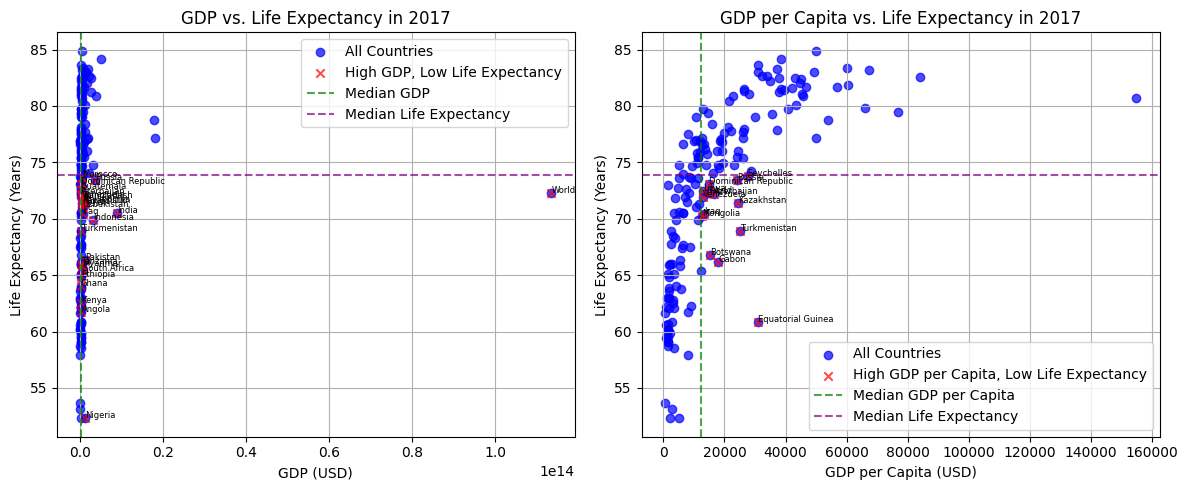

25 countries with high GDP and low Life Expectancy:
                   Entity  Life expectancy at birth (historical)           GDP
1633               Angola                                   61.7  2.460927e+11
3753           Azerbaijan                                   72.2  1.664056e+11
4536           Bangladesh                                   71.8  6.208116e+11
14432  Dominican Republic                                   73.1  1.599103e+11
15278               Egypt                                   71.3  1.182761e+12
16813            Ethiopia                                   64.8  1.897054e+11
20520               Ghana                                   64.0  1.240188e+11
21687           Guatemala                                   72.6  1.211617e+11
24360               India                                   70.5  8.733362e+12
24614           Indonesia                                   69.9  3.005911e+12
14 countries with high GDP per capita and low Life Expectancy:
                

In [16]:

# Filter data
high_gdp_low_expectancy = data_2017[(data_2017["GDP"] > median_gdp) & (data_2017["Life expectancy at birth (historical)"] < median_life_expectancy)]
high_GDP_per_capita_low_expectancy = data_2017[(data_2017["GDP per capita"] > median_GDP_per_capita) & (data_2017["Life expectancy at birth (historical)"] < median_life_expectancy)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: GDP vs. Life Expectancy
ax1.scatter(data_2017["GDP"], data_2017["Life expectancy at birth (historical)"], alpha=0.7, label='All Countries', color='blue')
ax1.scatter(high_gdp_low_expectancy["GDP"], high_gdp_low_expectancy["Life expectancy at birth (historical)"], 
            alpha=0.7, label='High GDP, Low Life Expectancy', color='red', marker='x')
for i, row in high_gdp_low_expectancy.iterrows():
    ax1.annotate(row['Entity'], (row['GDP'], row['Life expectancy at birth (historical)']), fontsize=6)
ax1.axvline(x=median_gdp, color='green', linestyle='--', label='Median GDP', alpha=0.7)
ax1.axhline(y=median_life_expectancy, color='purple', linestyle='--', label='Median Life Expectancy', alpha=0.7)
ax1.set_title("GDP vs. Life Expectancy in 2017")
ax1.set_xlabel("GDP (USD)")
ax1.set_ylabel("Life Expectancy (Years)")
ax1.grid(True)
ax1.legend()

# Second subplot: GDP per Capita vs. Life Expectancy
ax2.scatter(data_2017["GDP per capita"], data_2017["Life expectancy at birth (historical)"], alpha=0.7, label='All Countries', color='blue')
ax2.scatter(high_GDP_per_capita_low_expectancy["GDP per capita"], high_GDP_per_capita_low_expectancy["Life expectancy at birth (historical)"], 
            alpha=0.7, label='High GDP per Capita, Low Life Expectancy', color='red', marker='x')
for i, row in high_GDP_per_capita_low_expectancy.iterrows():
    ax2.annotate(row['Entity'], (row['GDP per capita'], row['Life expectancy at birth (historical)']), fontsize=6)
ax2.axvline(x=median_GDP_per_capita, color='green', linestyle='--', label='Median GDP per Capita', alpha=0.7)
ax2.axhline(y=median_life_expectancy, color='purple', linestyle='--', label='Median Life Expectancy', alpha=0.7)
ax2.set_title("GDP per Capita vs. Life Expectancy in 2017")
ax2.set_xlabel("GDP per Capita (USD)")
ax2.set_ylabel("Life Expectancy (Years)")
ax2.grid(True)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


print(f'{len(high_gdp_low_expectancy )} countries with high GDP and low Life Expectancy:')
print(high_gdp_low_expectancy[['Entity', 'Life expectancy at birth (historical)', 'GDP']].head(10))

print(f'{len(high_GDP_per_capita_low_expectancy )} countries with high GDP per capita and low Life Expectancy:')
print(high_GDP_per_capita_low_expectancy[['Entity', 'Life expectancy at birth (historical)', 'GDP per capita']].head(10))



From the definition of GDP per capita, there can can be a case where GDP per capita is low but because of high population of a country, GDP is high. This shows that GDP per capita is more related to the well being of each individual. With high GDP per capita, the total GDP of the country is high accordingly. But a country with high GDP doesn't have high GDP per capita necessarily. As can be seen in the results, the number of countries with strong economy and low life expectancy by GDP per capita as the measure is less than the number of countries with strong economy and low life expectancy by GDP. This confirms that GDP per capita has a better correlation with life expectancy as we know that it is more linked with individual well being.

In [14]:
# Top 10 countries by GDP
top_10_gdp = data_2017.nlargest(10, "GDP")[["Entity", "GDP","Life expectancy at birth (historical)"]]

# Top 10 countries by GDP per capita
top_10_gdp_per_capita = data_2017.nlargest(10, "GDP per capita")[["Entity", "GDP per capita","Life expectancy at birth (historical)"]]

print("Top 10 Countries by GDP:")
print(top_10_gdp)

print("\nTop 10 Countries by GDP per Capita:")
print(top_10_gdp_per_capita)

Top 10 Countries by GDP:
               Entity           GDP  Life expectancy at birth (historical)
61778           World  1.135725e+14                                   72.3
10530           China  1.795836e+13                                   77.2
59438   United States  1.781129e+13                                   78.8
24360           India  8.733362e+12                                   70.5
26991           Japan  4.865721e+12                                   84.2
20268         Germany  3.769306e+12                                   80.9
46092          Russia  3.497062e+12                                   73.4
24614       Indonesia  3.005911e+12                                   69.9
7288           Brazil  2.908978e+12                                   74.8
58762  United Kingdom  2.496115e+12                                   81.2

Top 10 Countries by GDP per Capita:
                     Entity  GDP per capita  \
45448                 Qatar      154669.030   
41232              

In comparison to using GDP, using GDP per capita as a measure of economic strength yields a different ranking of nations. Qatar, Norway, and the United Arab Emirates, who do not rank in the top 10 when considering GDP, are among the top nations according to GDP per capita. This is so because, in contrast to GDP, which is a measurement of a country's overall economic production, GDP per capita represents the average income of a country's population. Therefore GDP per capita cannot be considered as an indicator of a good economy alone. It is crucial to remember that it does not fully represent the strength of an economy. When determining a nation's economic health, other aspects including income disparity, unemployment rates, and poverty levels should also be considered.

## References:

1. Max Roser, Esteban Ortiz-Ospina and Hannah Ritchie (2013) - "Life Expectancy" , "Life Expectancy and GDP". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/life-expectancy' [Online Resource]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05d86ed7-77dc-4d57-baa3-23063c711d41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>